In [1]:
using StaticArrays, DifferentialEquations, DynamicalSystems
x = y = z = -15..15
box = x × y × z
using CairoMakie

In [2]:
function TM(u, p, t)
    
    U(y) = U0 + ΔU0 / ( 1 + exp( -50*(y-ythr) ) )
    σ(x) = 1 / ( 1 + exp( -20*(x-xthr) ) )

    E, x, y = u
    α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0 = p

    du1 = (-E + α * log( 1 + exp( (J * U(y) * x * E + I0  ) / (α) ) ) ) / τ
    du2 = (1-x)/τD - U(y)*x*E
    du3 = (-y)/τy+β*σ(x)
    return SVector(du1, du2, du3)
end

TM (generic function with 1 method)

In [28]:
function output_fp(ds, box)
    fp, eigs, _ = fixedpoints(ds, box)
    
    if length(fp) == 1
        println("coordinates fp:$(fp[1])")
        println("eigenvalues fp:$(eigs[1])")
    else
        for idx in range(1, length(fp), step = 1)
            println("coordinates fp:$(fp[idx])")
            println("eigenvalues fp:$(eigs[idx])")
            println("")
        end
    end
end

output_fp (generic function with 2 methods)

In [33]:
t = 250.0
tt = 250.0
tstep = 0.001
trange = range(0.0, t, step = tstep);
integ_set = (alg = RK4(), adaptive = false, dt = tstep);

In [150]:
const τ = 0.013; const τD = 0.15; const τy = 1.8; const J = 3.07; const β = 0.4375;
α = 1.15; U0 = 0.3; const I0 =  -1.7;

xthr = 0.8; ythr = 0.4
ΔU0 = 0.45

0.45

In [156]:
p = SA[α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0]
u0 = SA[2.365849242014262, 0.809, 0.429]# [0.664750570875855, 0.947145694859555, 0.4368659535211039]

3-element SVector{3, Float64} with indices SOneTo(3):
 2.365849242014262
 0.809
 0.429

In [157]:
ds = ContinuousDynamicalSystem(TM, u0, p)

3-dimensional continuous dynamical system
 state:       [2.36585, 0.809, 0.429]
 rule f:      TM
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [1.15, 0.013, 0.15, 1.8, 3.07, …, 0.4, 0.3, 0.45, 0.4375, -1.7]

In [153]:
output_fp(ds, box)

coordinates fp:[2.365849242014262, 0.8090261840575805, 0.4291943944462681]
eigenvalues fp:ComplexF64[-7.486315214432861 + 0.0im, 5.045744495464903 + 0.0im, 27.563690162141143 + 0.0im]

coordinates fp:[1.037110814282319, 0.895515766546521, 0.6859554734789847]
eigenvalues fp:ComplexF64[-4.007198107046846 + 0.0im, -0.5555361244586321 + 0.0im, 13.881582407308347 + 0.0im]

coordinates fp:[0.688024161533207, 0.9281580470421509, 0.7311565155401125]
eigenvalues fp:ComplexF64[-5.044783852922681 - 5.798540670176693im, -5.044783852922681 + 5.798540670176693im, -0.5555563195935003 + 0.0im]



### trajectory

In [161]:
tr = trajectory(ds, t, Δt = tstep;diffeq = integ_set);

### Graphics

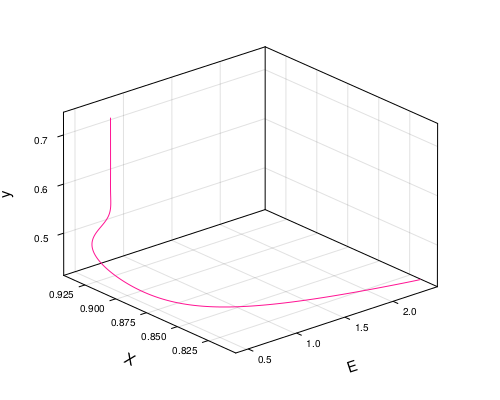

In [162]:
lb_size = 15
tck_size = 10
f = Figure(resolution = (500, 400))
axis3 = Axis3(f[1, 1], xlabel = "E", ylabel = "X", zlabel = "y",
                xlabelsize = lb_size, ylabelsize = lb_size, zlabelsize = lb_size,
                xticklabelsize = tck_size, yticklabelsize = tck_size, zticklabelsize = tck_size)
lines!(axis3, tr[:, 1], tr[:, 2], tr[:, 3], linewidth = 1.0, color = :deeppink)
f